In [57]:
%config InlineBackend.figure_format = 'retina'
%load_ext autoreload
%autoreload 2

import numpy as np
from matplotlib import pyplot as plt 
import roomacoustics.edc_noise_handling as nh 
from roomacoustics import test_edc_noise_handling as test_enh
import roomacoustics as ra
from roomacoustics import analytic

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [162]:
samplingrate = 3000

test = analytic.rectangular_room_rigid_walls([1, 1, 1],
                                 [0.2, 0.3, 0.4],
                                 [0.5, 0.6, 0.7],
                                 1,
                                 1000,
                                 n_samples=2**13,
                                samplingrate=samplingrate)
test_rir_array = np.zeros(([2, test[0].size]))
psnr = 50
rir_noise = 10**(-(psnr-10) / 20) * np.random.normal(0,1,test[0].size)
test_rir = test[0]
test_rir /= np.amax(np.abs(test_rir))

test_rir_array[0,:] = test_rir + rir_noise
test_rir_array[1,:] = test_rir + rir_noise
test_rir_noise = test_rir + rir_noise

edc_lundeby = nh.energy_decay_curve_lundeby(test_rir_array, samplingrate, freq='broadband', plot=False, is_energy=False)
edc_chu = nh.energy_decay_curve_lundeby(test_rir_array, samplingrate, freq='broadband', plot=False, is_energy=False)
edc_chu_lundeby = nh.energy_decay_curve_chu_lundeby(test_rir_array, samplingrate, freq='broadband', plot=False, is_energy=False)

#np.savetxt("../roomacoustics/resources/test_data/analytic_rir_psnr50.csv", test_rir_noise, delimiter=",")
#np.savetxt("../roomacoustics/resources/test_data/edc_lundeby_psnr50.csv", edc_lundeby, delimiter=",")
#np.savetxt("../roomacoustics/resources/test_data/edc_chu_psnr50.csv", edc_chu, delimiter=",")
#np.savetxt("../roomacoustics/resources/test_data/edc_chu_lundeby_psnr50.csv", edc_chu_lundeby, delimiter=",")



# plt.semilogx(np.fft.rfftfreq(2**17, 1/44100), 10*np.log10(np.abs(np.fft.rfft(test_rir))))
# plt.grid()
# plt.plot(10*np.log10(test_rir))

array([[1.        , 0.96758602, 0.96757616, ...,        nan,        nan,
               nan],
       [1.        , 0.96758602, 0.96757616, ...,        nan,        nan,
               nan]])

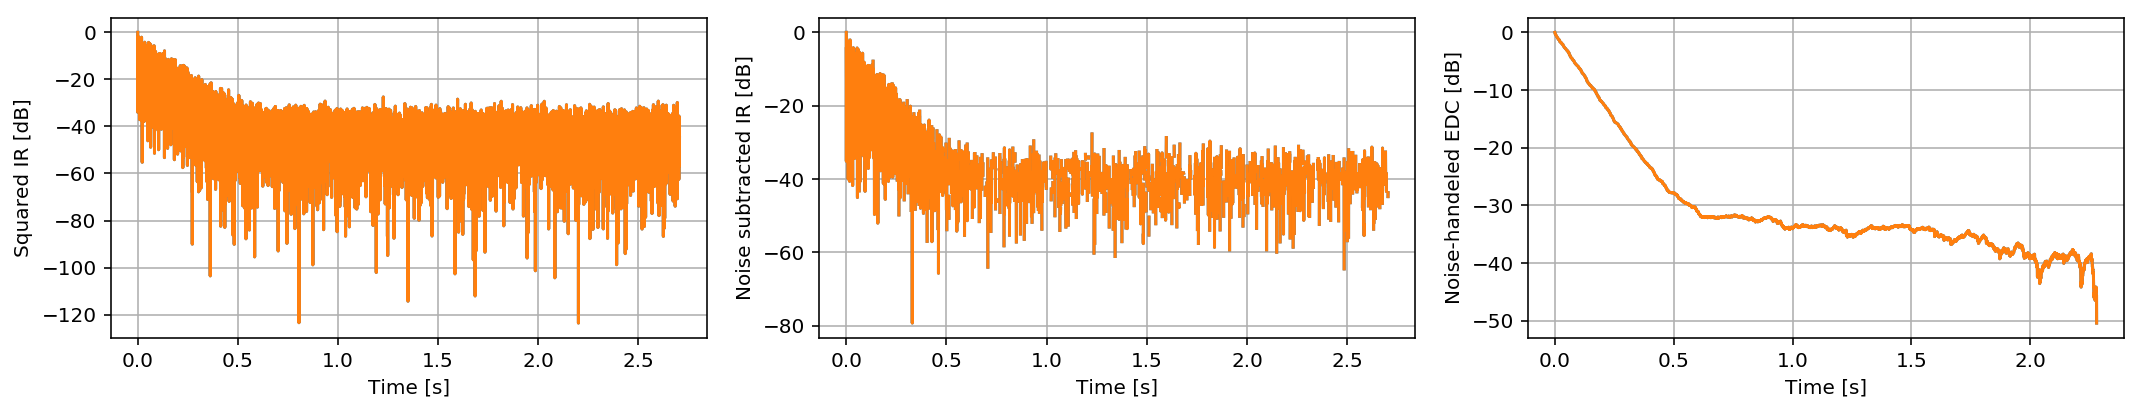

In [163]:
nh.energy_decay_curve_chu(test_rir_array, samplingrate, freq='broadband', plot=True, is_energy=False, normalize=True, time_shift=True)

array([[1.        , 0.96772142, 0.96770852, ...,        nan,        nan,
               nan]])

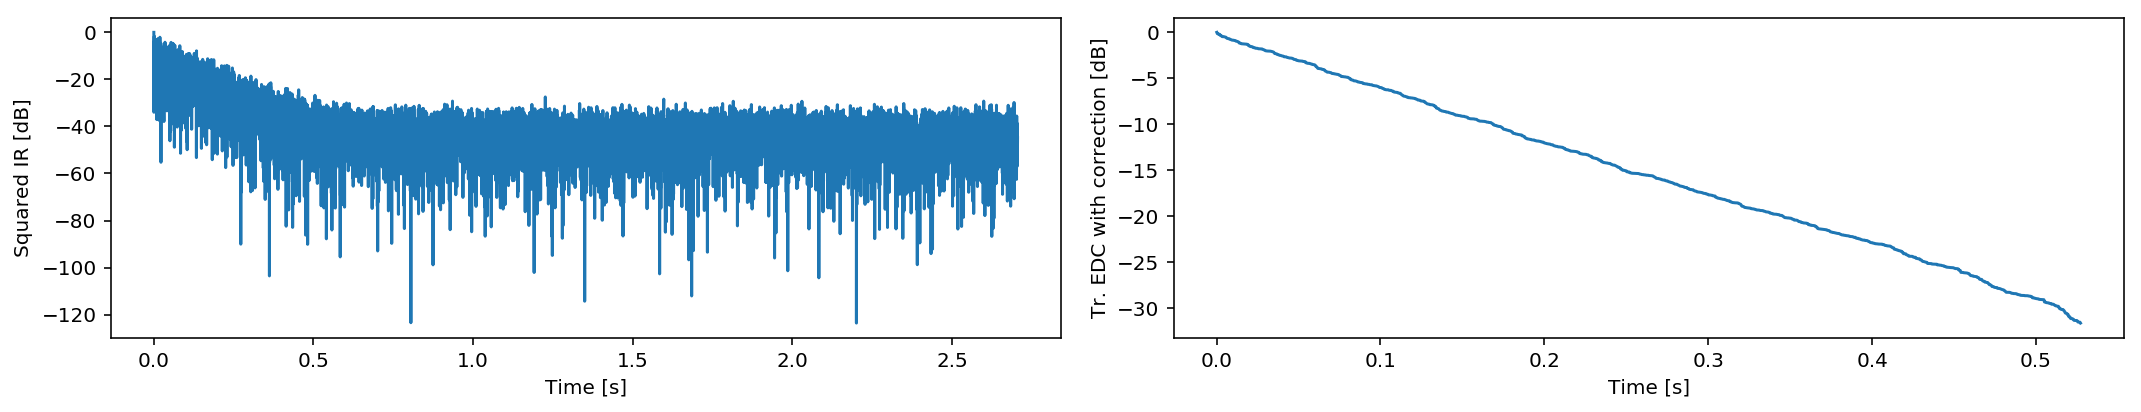

In [164]:
nh.energy_decay_curve_lundeby(test_rir_noise, samplingrate, freq='broadband', plot=True, is_energy=False)

array([[1.        , 0.96756621, 0.96755635, ...,        nan,        nan,
               nan],
       [1.        , 0.96756621, 0.96755635, ...,        nan,        nan,
               nan]])

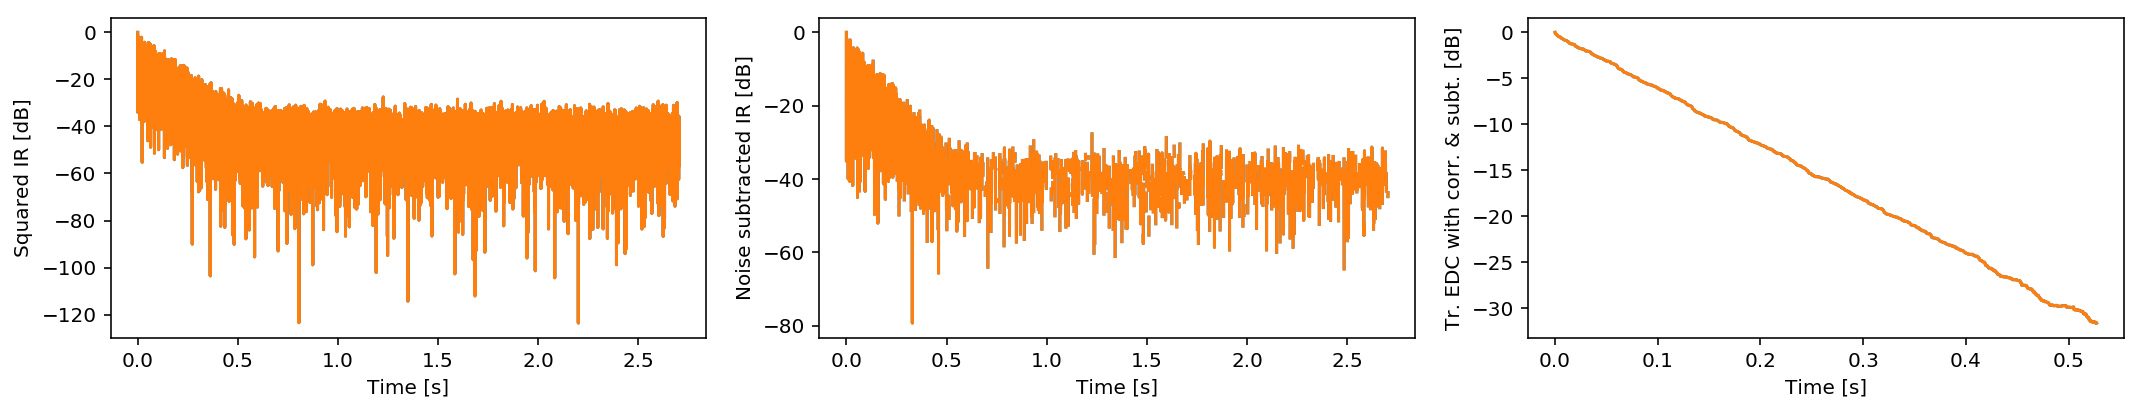

In [165]:
nh.energy_decay_curve_chu_lundeby(test_rir_array, samplingrate, freq='broadband', plot=True, is_energy=False)

In [171]:
nh.energy_decay_curve_truncation(test_rir_noise, samplingrate, freq='broadband', is_energy=False)

array([[1.        , 0.96769974, 0.96768683, ..., 0.        , 0.        ,
        0.        ]])

(array([0.55267496, 0.55267496]),
 array([1.00835367, 1.00835367]),
 array([-40.04649848, -40.04649848]))

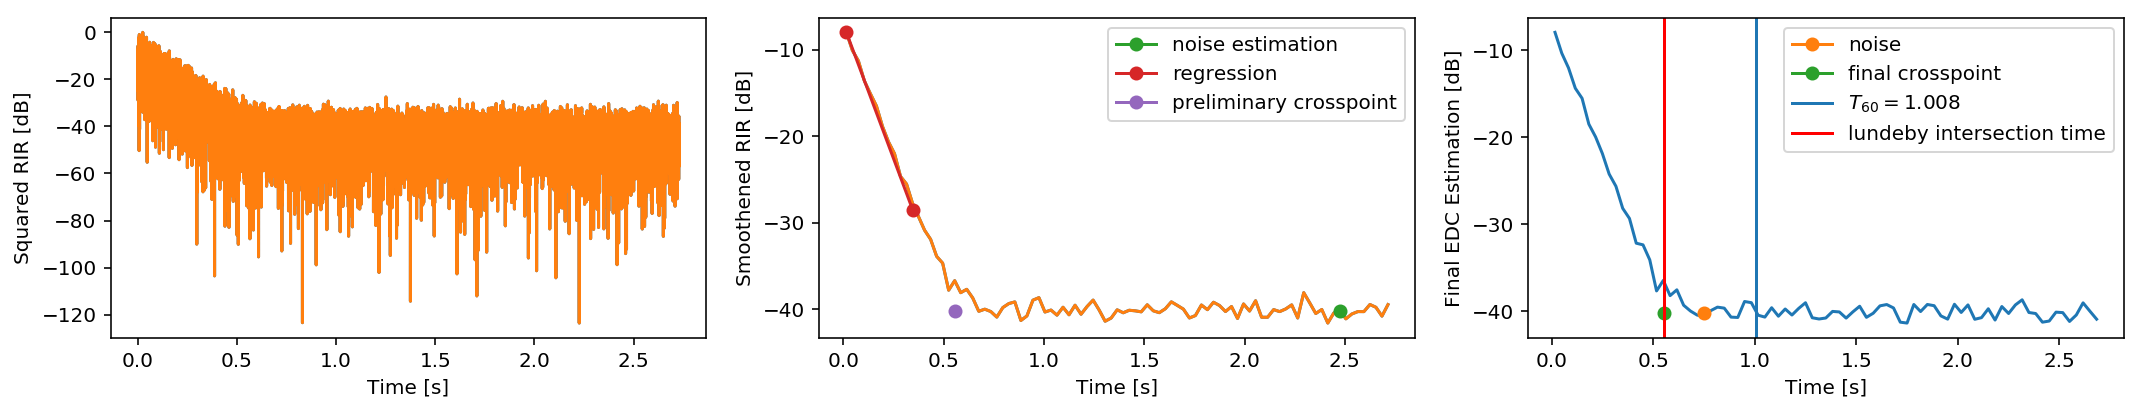

In [174]:
nh.intersection_time_lundeby(test_rir_array, samplingrate, freq='broadband', is_energy=False, plot=True)